In [30]:
import matplotlib.pyplot as plt

import numpy as np
from scipy import optimize

import time

from datetime import datetime
from time import mktime

from scipy.optimize import curve_fit, least_squares

18.9415


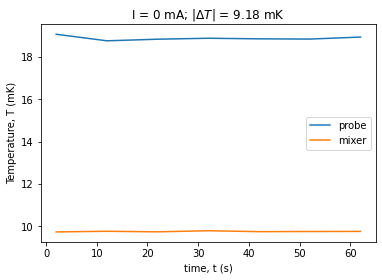

18.7887


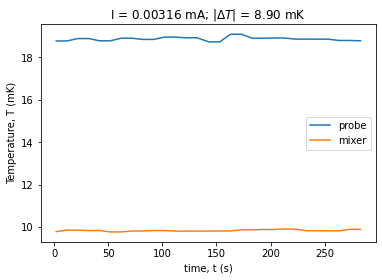

18.889


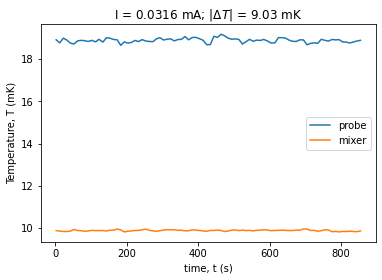

18.9588


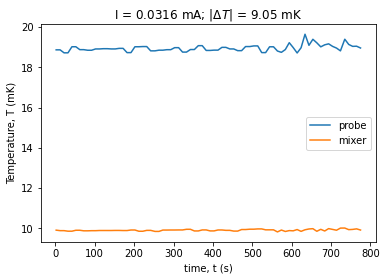

20.3623


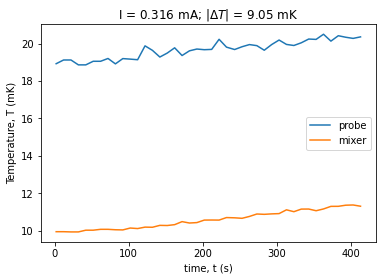

57.1975


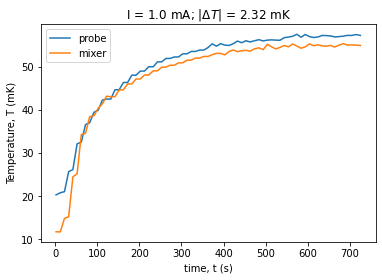

87.7833


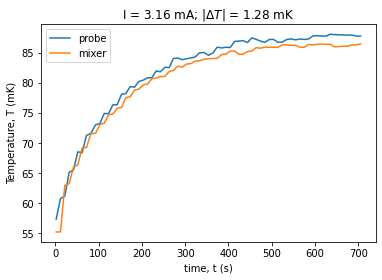

192.332


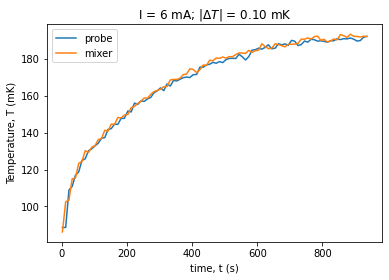

277.685


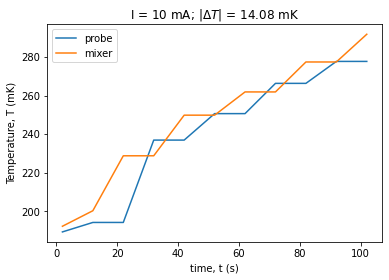

514.606


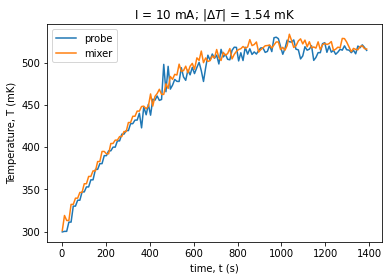

19.539


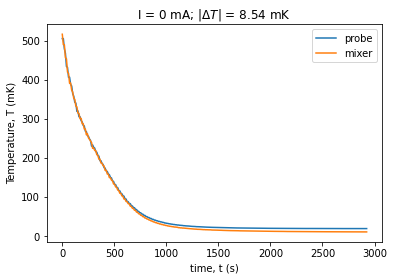

In [36]:
def model(params, x):
    """[summary]

    Args:
        params ([type]): [description]
        x ([type]): [description]
    """
    a, b, lam = params
    ypred = a * (1 - b * np.exp(-x/lam))
    return ypred


def error_func(params, x, y):
    """Least squares error function

    Args:
        x ([type]): [description]
        a ([type]): [description]
        b ([type]): [description]
        c ([type]): [description]
    """
    ypred = model(params, x)
    return np.abs(ypred - y)


def get_times(timestamps):
    """Get the time stamps in seconds.

    Args:
        timestamps (list): A list of unix time stamps
    
    Returns:
        times (list): A list of times starting from 0 in seconds
    """
    times = [time.gmtime(td) for td in timestamps]
    dt = [datetime.fromtimestamp(mktime(struct)) for struct in times]
    diff = np.array([(dt[i] - dt[0]).total_seconds() for i in range(1, len(dt))])

    # start from 0 and add the differences to make the list of times (in s)
    return np.concatenate([[2], diff])

fnames = [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]
currents = [0, 3.16/1e3, 31.6/1e3, 31.6/1e3, 316./1e3, 1., 3.16, 6, 10, 10, 0] #mA

for i, idx in enumerate(fnames):
    datafile_path = 'temperature_measurement_T(P)_09_2021-10-20-Sweep0{}.txt'.format(str(idx))
    data = np.loadtxt(datafile_path)

    tprobe = data[:, -1]*1e3
    tmixer = data[:, -2]*1e3

    print(tprobe[-1])

    tlist = get_times(data[:, -3])

    plt.title(r"I = {} mA; |$\Delta T$| = {:.2f} mK".format(currents[i], np.abs(tprobe[-1] - tmixer[-1])))
    plt.plot(tlist, tprobe, label='probe')
    plt.plot(tlist, tmixer, label='mixer')

    plt.xlabel("time, t (s)")
    plt.ylabel("Temperature, T (mK)")

    plt.legend()
    plt.show()

In [34]:
tempfull = np.array([])
breaks = [0]


for i, idx in enumerate(fnames):
    datafile_path = 'temperature_measurement_T(P)_09_2021-10-20-Sweep0{}.txt'.format(str(idx))

    data = np.loadtxt(datafile_path)
    tprobe = data[:, -1]*1e3
    tmixer = data[:, -2]*1e3
    
    break_val = breaks[-1] + len(tmixer)
    breaks.append(break_val)

    tempfull = np.concatenate([tempfull.ravel(), tprobe.ravel()])

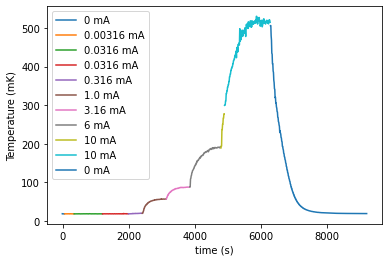

In [35]:
dt = 10
xarr = [0 + (i - 1)*dt for i in range(len(tempfull))]

for i in range(1, len(breaks)):
    x = np.array(xarr[breaks[i-1]:breaks[i]])
    y = np.array(tempfull[breaks[i-1]:breaks[i]])
    plt.plot(x, y, label="{} mA".format(currents[i-1]))

plt.xlabel("time (s)")
plt.ylabel("Temperature (mK)")
plt.legend()

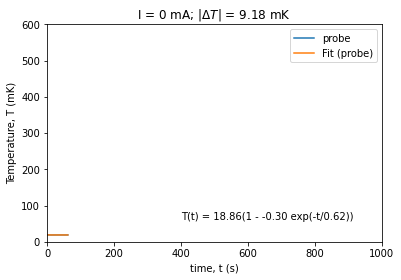

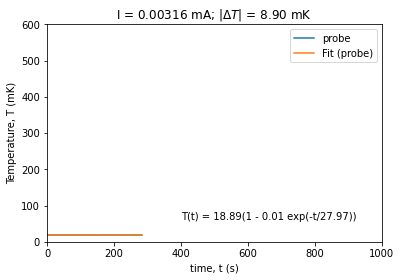

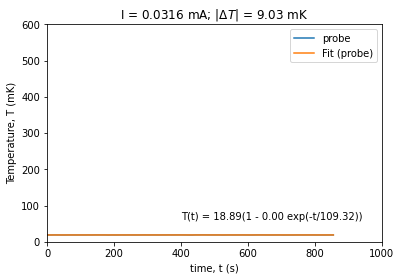

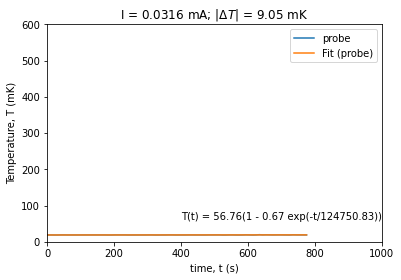

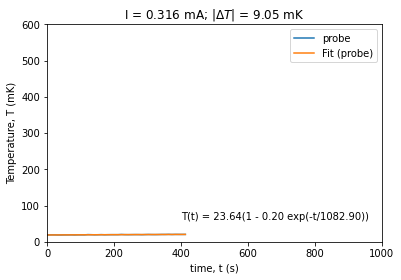

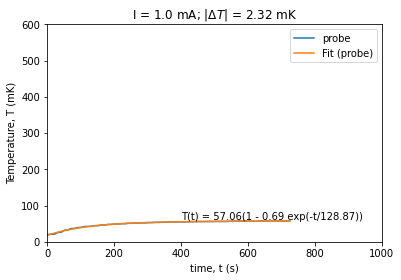

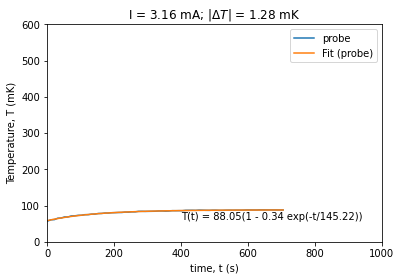

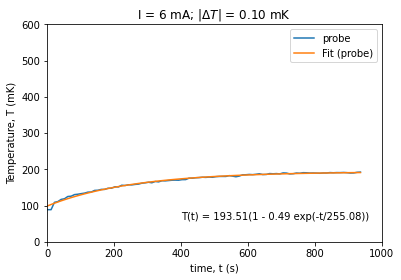

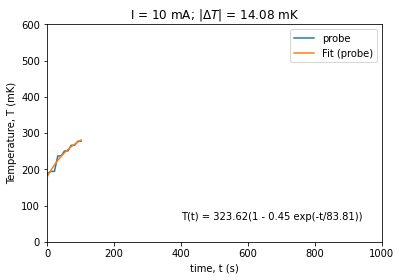

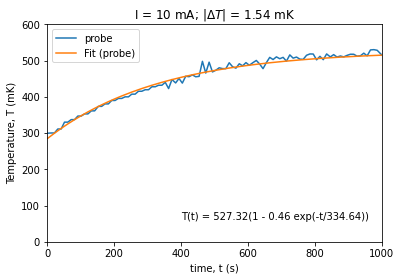

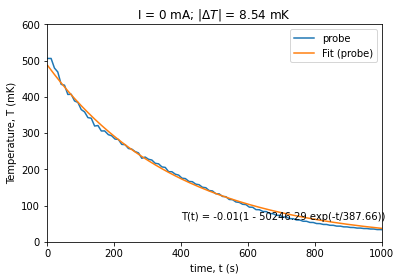

In [53]:
fnames = [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]
currents = [0, 3.16/1e3, 31.6/1e3, 31.6/1e3, 316./1e3, 1., 3.16, 6, 10, 10, 0] #mA

for i, idx in enumerate(fnames):
    datafile_path = 'temperature_measurement_T(P)_09_2021-10-20-Sweep0{}.txt'.format(str(idx))
    data = np.loadtxt(datafile_path)

    tprobe = data[:, -1]*1e3
    tmixer = data[:, -2]*1e3

    tlist = get_times(data[:, -3])

    plt.title(r"I = {} mA; |$\Delta T$| = {:.2f} mK".format(currents[i], np.abs(tprobe[-1] - tmixer[-1])))
    plt.plot(tlist, tprobe, label='probe')
    # plt.plot(tlist, tmixer, label='mixer')

    plt.xlabel("time, t (s)")
    plt.ylabel("Temperature, T (mK)")



    x = tlist
    y = tprobe

    x0 =  [y[-1], y[-1]/2, (x[-1] - x[0])/2]
    res = least_squares(error_func,
                    x0, args=[x, y])
    ypred = model(res.x, x)

    plt.plot(x, ypred, label='Fit (probe)')
    # plt.text(x[-1] -100 , y[-1]-20, "{:.2f}".format(res.x[2]))

    plt.text(400, 60, "T(t) = {:.2f}(1 - {:.2f} exp(-t/{:.2f}))".format(*res.x))

    plt.xlim(0, 1000)
    plt.ylim(0, 600)
    plt.legend()
    plt.show()